### Scientific Libraries

The core language of Python is rather small. You almost always need to import additional functionality in the form of scientific libraries, i.e. collections of efficient code that implement certain routines. 

In terms of popularity, the big four Python libraries are:

1. **NumPy**: provides basic array data types such as vectors and matrices plus core array operations & basic numerical programming (e.g. random number generator, common mathematical functions)
2. **SciPy**: adds other kinds of numerical methods that are routinely used (e.g. interpolation, optimization)
3. **Matplotlib**: for generating figures, with a focus on plotting data stored in NumPy arrays
4. **Pandas**: provides data types and functions for empirical work (e.g. manipulating data), fast and efficient data analysis tool

Use `import` to load any packages in the first lines of your program and access functionalities afterwards via the syntax `packagename.attribute`. Example:

In [121]:
import numpy as np  # imports package as 'np' (shorter)
np.sqrt(4)

2.0

Another way to access NumPy's square root function directly is

In [122]:
from numpy import sqrt
sqrt(4)

2.0

### Introduction to Data Management with Pandas

This section borrows parts from the corresponding [Chapter](https://python-programming.quantecon.org/pandas/html) of the [QuantEcon Python Programming for Economics and Finance course](https://python-programaming.quantecon.org/intro.html) by Thomas J. Sargent and John Stachurski. The [pandas documentation](https://pandas.pydata.org/docs/index.html) is also a great resource for this part.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importing a sub-routine
plt.rcParams["figure.figsize"]=[10,8] # Set default figure 1e
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams.update({"figure.figsize" : (10, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "white"})

Two important data types defined by pandas are `Series` and `DataFrame`. 

You can think of a Series as a "column" of data, such as a collection of observations for a single variable. A DataFrame is an object for storing multiple *related* columns of data.

#### Series

Imagine four listed companies with the values being daily returns on their shares:

In [124]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.111743
1    2.465630
2    0.079518
3    0.644577
Name: daily returns, dtype: float64

Pandas `Series` are built on top of NumPy arrays and support many similar operations. For example:

In [125]:
s * 100

0    -11.174312
1    246.562973
2      7.951756
3     64.457741
Name: daily returns, dtype: float64

In [126]:
s.describe()

count    4.000000
mean     0.769495
std      1.175461
min     -0.111743
25%      0.031702
50%      0.362047
75%      1.099840
max      2.465630
Name: daily returns, dtype: float64

In [127]:
s.index = ['AMZN','APPL','MSFT','GOOG'] # flexible indices
s

AMZN   -0.111743
APPL    2.465630
MSFT    0.079518
GOOG    0.644577
Name: daily returns, dtype: float64

In [128]:
s['AMZN'] # show indexed value

-0.1117431169990755

In [129]:
s['AMZN'] = 0 # edit individual values
s

AMZN    0.000000
APPL    2.465630
MSFT    0.079518
GOOG    0.644577
Name: daily returns, dtype: float64

In [130]:
'APPL' in s

True

#### DataFrames

A `DataFrame` contains several columns, one for each variable. For example:

In [131]:
df = pd.DataFrame({'categorical': pd.Categorical(['d','e','f']), 
                   'numeric': [1,2,3],
                   'object':['a','b','c']    
                    })
df

,categorical,numeric,object
0,d,1,a
1,e,2,b
2,f,3,c


In [132]:
df.describe() # by default only numeric fields are returned

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [133]:
df.describe(include='all') 

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,d,NaN,a
freq,1,NaN,1
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN
50%,NaN,2.0,NaN
75%,NaN,2.5,NaN


Now let's assume we have a CSV file with data stored on our computer that we want to work with. You can read it in using the `pandas` function `read_csv`.

In [134]:
df = pd.read_csv('./data/test_pwt.csv') # make sure path is set correctly

If you want to directly access a file from a website you can use the same code with the URL in brackets. If you want to read in data contained in a Stata `.dta` file to dataframes, use pandas' `.read_stata()` routine.

There is also a library called [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest) that gives you access to many data sources (e.g. from the World Bank) straight from the Jupyter notebook.

>Tip: Raw data in CSV format can always be viewed by double-clicking on the file in the browser.

In [135]:
df # display data

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [136]:
type(df) # check type of object at hand

pandas.core.frame.DataFrame

In [137]:
df.head() # useful method to investigate data frame

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [138]:
len(df) # number of rows/obs

8

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8 non-null      object 
 1   country isocode  8 non-null      object 
 2   year             8 non-null      int64  
 3   POP              8 non-null      float64
 4   XRAT             8 non-null      float64
 5   tcgdp            8 non-null      float64
 6   cc               8 non-null      float64
 7   cg               8 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 640.0+ bytes


Missing values are usually represented in the form of NaN or null or None in the dataset.

In [140]:
df.isnull()

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


In [141]:
print(df.isnull().sum()) #check if there are null values across variables (axis = 0 by default)

country            0
country isocode    0
year               0
POP                0
XRAT               0
tcgdp              0
cc                 0
cg                 0
dtype: int64


In [142]:
print(df.isnull().sum(axis = 1)) #check if there are null values across rows 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


In [143]:
df[2:5] # select particular rows or:
df.loc[df.index[2:5]]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [144]:
df[['country','tcgdp']] # select particular columns

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, you can use the `iloc` attribute with the syntax `.iloc[rows,columns]`

In [145]:
df.iloc[2:5,0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using both integers and labers, use the `loc` attribute

In [146]:
df.loc[df.index[2:5],['country','tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [147]:
df.iloc[3] # use single label returns series

country                  Israel
country isocode             ISR
year                       2000
POP                     6114.57
XRAT                    4.07733
tcgdp              129253.89423
cc                    64.436451
cg                    10.266688
Name: 3, dtype: object

In [148]:
df.loc[[df.index[3]]] ## Give series of one index to get a dataframe of that series

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
3,Israel,ISR,2000,6114.57,4.07733,129253.89423,64.436451,10.266688


In [149]:
pd.DataFrame(df.iloc[3]).transpose() ##This also gives you the dataframe

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
3,Israel,ISR,2000,6114.57,4.07733,129253.89423,64.436451,10.266688


In [150]:
subset = df.country.str.contains('t') # extract indeces of all countries containing a 't' in their name
subset

0     True
1     True
2    False
3    False
4    False
5     True
6     True
7    False
Name: country, dtype: bool

In [151]:
df.loc[subset].head()

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.72483,5.418047e+05,67.759026,6.720098
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [152]:
print(len(df.country[subset])) # how many are there?

4


If you are only interested in a sub-set of variables, you can strip the data frame down to only those variables by overwriting it using the selection methods described above:

In [153]:
df = df[['country','POP','tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [154]:
df = df.set_index('country') # set index to be country because it is redundant
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [155]:
df.columns = 'population', 'total GDP' # rename columns
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [156]:
df['population'] = df['population'] * 1e3 # convert population from thousands to single units
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [157]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population'] # adding a column showing real GDP per capita, obtained by the other two columns
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


In [158]:
df.describe()

,population,total GDP,GDP percap
count,8.000000e+00,8.000000e+00,8.000000
mean,1.763826e+08,1.606312e+06,13448.569581
std,3.479223e+08,3.397025e+06,13047.950117
min,3.219793e+06,5.026222e+03,425.896679
25%,1.037977e+07,1.032544e+05,4211.316944
50%,2.819442e+07,2.611573e+05,7873.599852
75%,1.043411e+08,8.383896e+05,22963.112877
max,1.006300e+09,9.898700e+06,35080.381854


#### Plotting

Data objects in `pandas` have methods for plotting and visualization that work through `matplotlib`. For example:

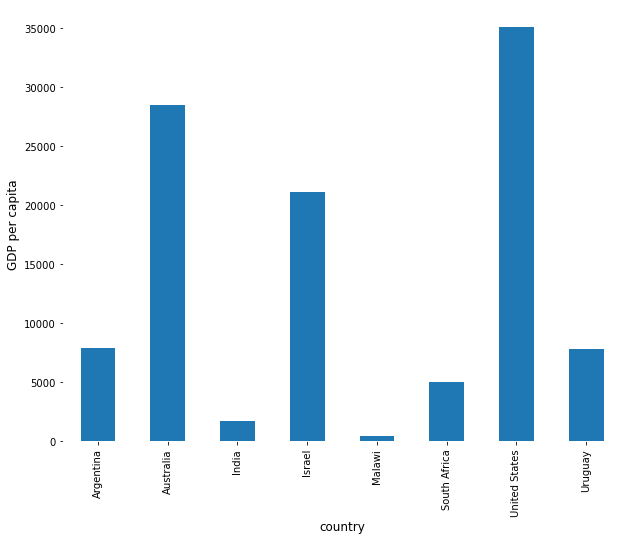

In [159]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show() # remember we called the `pyplot` routine of matplotlib "plt"

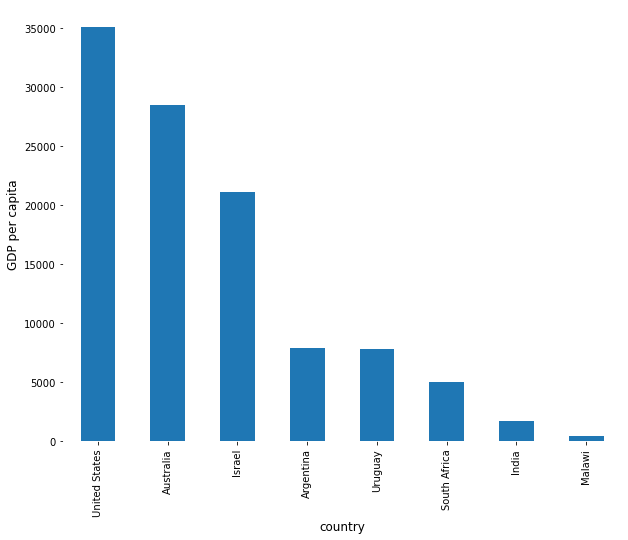

In [160]:
df = df.sort_values(by='GDP percap', ascending=False) # change order of data frame from alphabetically to GDP per capita

ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)


plt.show()

#### Introduction to working with (Geographic) arrays: Rioxarray + Xarray + Numpy

Much geographic data comes in raster form, that is, a uniform grid of cells where each cell is assigned a value, and the location of each cell in the grid tells us about its location in space or time along regular intervals. 

When it comes to working with array data in Python, it's important to realize that the most cutting-edge or more specialized libraries inherit things from more general ones. In this example we will be using a Rioxarray dataset, which is an extension of an Xarray dataset adding geograhy-based indexes, CRS projections and more, and Xarray in turn is based on Numpy arrays. 

From a practical point of view, this means that Rioxarray datasets 'inherit' the characteristics and the methods associated with Xarray and Numpy arrays, Just like Geopandas inherits all Pandas methods and Pandas Series inherit Numpy methods (And in fact the computation happens inside the Numpy module too)

In [161]:
import os
import pandas as pd, geopandas as gp, numpy as np
import rasterio
from rasterio.windows import Window
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling
from shapely.geometry import shape
from rasterio.windows import from_bounds
from tqdm import tqdm
import xarray, rioxarray

In [162]:
msa_localfile = ('./data/msa1999_boundaries.shp')
indianapolis_elevation_file = './data/indianapolis_elevation.tif'

In [163]:
msa_shapes = gp.read_file(msa_localfile)
indy_elevation = rasterio.open(indianapolis_elevation_file)
indy_elevation_rio = rioxarray.open_rasterio(indy_elevation).sel(band = 1)
indy_elevation_xarray = xarray.DataArray(data = indy_elevation_rio.data, dims = ['x', 'y'], coords = (list(range(0, 7200*30, 30)), list(reversed(range(0, 7200*30, 30)))))
# indy_elevation_rio = indy_elevation_rio[1200:2400, 1200:2400]

You can use Numpy methods on a rioxarray, and it returns a rioxarray (In this case, a boolean type of pixels where elevation is higher than 200 meters):

In [164]:
indy_elevation_rio_high = np.greater(indy_elevation_xarray, 200); indy_elevation_rio_high

<xarray.DataArray (x: 7200, y: 7200)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * x        (x) int64 0 30 60 90 120 150 ... 215850 215880 215910 215940 215970
  * y        (y) int64 215970 215940 215910 215880 215850 ... 120 90 60 30 0

Rioxarrays have a method implemented for plotting: 

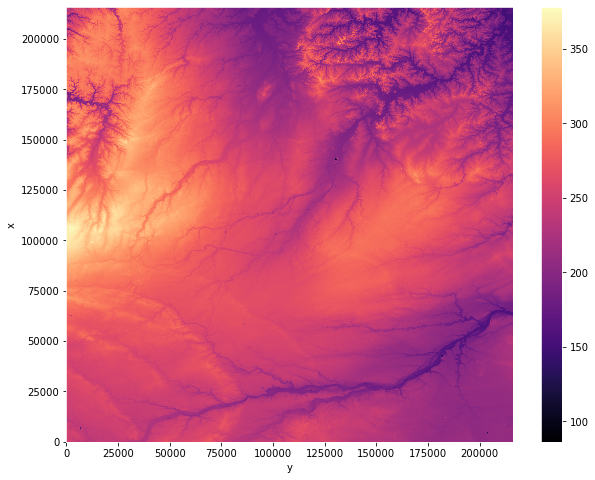

In [165]:
indy_elevation_xarray.plot(cmap = 'magma')

You can use the `np.asarray()` method to "extract" the underlying array data out of the `rioxarray` data array, however, it becomes stripped of all the additional attributes and methods provided by `rioxarray`

In [166]:
indy_elevation_rio_array = np.asarray(indy_elevation_xarray)
indy_elevation_rio_array

array([[207.57849, 207.51236, 207.4924 , ..., 248.5301 , 248.60011,
        248.63893],
       [207.67952, 207.5192 , 207.44365, ..., 248.64462, 248.68864,
        248.70728],
       [207.91185, 207.72755, 207.60974, ..., 248.82074, 248.7907 ,
        248.78374],
       ...,
       [149.76297, 149.55061, 149.5245 , ..., 182.96803, 176.5112 ,
        170.92838],
       [149.21999, 149.50389, 149.51604, ..., 177.49829, 172.43712,
        167.94344],
       [149.36816, 149.16765, 149.56227, ..., 172.4757 , 167.78792,
        164.46272]], dtype=float32)

Numpy arrays do not have an own method for plotting: 

```python
indy_elevation_rio_array.plot()


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
h:\My Drive\CEMFI\2022_PhD\gds4ae_practice_2023\session1.ipynb Cell 147 in <cell line: 1>()
----> 1 indy_elevation_rio_array.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'
```

#### Calculations on rasters: Use methods implemented by others!!!!
Here we have a weakness of Python: loops are really, really, really slow. Python is a slow language in general. People use Python for data science and GIS because the packages that we have been looking at so far do not actually run on Python itself, they are libraries which tie to programs written in compiled languages like C. This means that when you use the methods provided in packages like Numpy, Pandas, Xarray, etc. they are actually calling compiled, optimized libraries, and they are much, much, much faster than anything you can write yourself in Python. 

##### A function to calculate slope of a raster written in pure Python: 

This is a function to calculate slope in degrees from a DEM, using the algorithm that is present in ArcGIS. For context, this is ported from a Julia program in my research, where writing loops yourself is very fast and efficient computationally. 

In [167]:
import numpy as np
from tqdm.contrib.itertools import product as tqdmproduct
from itertools import product
from xrspatial.utils import (ArrayTypeFunctionMapping, cuda_args, get_dataarray_resolution, ngjit)

def point_slope(arr, i, j): ##Given array, indexes i and j, calculate the slope from the formula in ArcGis
    ##Note that it fails on the edges of the array!
    temprows = (max(i-1,0), min(i+2, np.shape(arr)[1]))
    tempcols = (max(j-1,0), min(j+2, np.shape(arr)[1]))
    temp = arr[temprows[0]:temprows[1], tempcols[0]:tempcols[1]]    
    dz_dx = ((temp[0,2]+temp[2,2]+2.0*temp[1,2])-(temp[0,0]+temp[2,0]+2.0*temp[2,1]))/240.0
    dy_dx = ((temp[2,0]+temp[2,2]+2.0*temp[2,1])-(temp[0,0]+temp[0,2]+2.0*temp[1,2]))/240.0
    deg = np.arctan(sqrt(np.square(dz_dx) + np.square(dy_dx)))*57.29578
    return deg

def calc_slope(arr): ##Loop over elements of the array calculating the slope
    rug = np.zeros((np.shape(arr)[0], np.shape(arr)[1]), dtype = np.float32)
    rug[:] = np.nan
    for i, j in tqdmproduct(range(1,(np.shape(arr)[0]-1)), range(1,(np.shape(arr)[1]-1))):
        rug[i,j] = point_slope(arr, i, j)
    return rug

def outer_calc_slope(arr, name: str = 'slope'): ##For use with xarrays: extract the data first (Huge optimization)
    out = calc_slope(arr.data)
    return xarray.DataArray(out,
                        name=name,
                        coords=arr.coords,
                        dims=arr.dims,
                        attrs=arr.attrs)

##### The same functions written with JIT compilation:

In [168]:
@ngjit
def point_slope_jit(arr, i, j):
    temprows = (max(i-1,0), min(i+2, np.shape(arr)[1]))
    tempcols = (max(j-1,0), min(j+2, np.shape(arr)[1]))
    temp = arr[temprows[0]:temprows[1], tempcols[0]:tempcols[1]]    
    dz_dx = ((temp[0,2]+temp[2,2]+2.0*temp[1,2])-(temp[0,0]+temp[2,0]+2.0*temp[2,1]))/240.0
    dy_dx = ((temp[2,0]+temp[2,2]+2.0*temp[2,1])-(temp[0,0]+temp[0,2]+2.0*temp[1,2]))/240.0
    deg = np.arctan(sqrt(np.square(dz_dx) + np.square(dy_dx)))*57.29578
    return deg

@ngjit
def calc_slope_jit(arr): 
    rug = np.zeros((np.shape(arr)[0], np.shape(arr)[1]), dtype = np.float32)
    rug[:] = np.nan 
    for i in range(1,(np.shape(arr)[0]-1)):
        for j in range(1,(np.shape(arr)[1]-1)):
            rug[i,j] = point_slope_jit(arr, i, j)
    return rug

def calc_slope_outer(arr,
          name: str = 'slope'):
    out = calc_slope_jit(arr.data)
    return xarray.DataArray(out,
                        name=name,
                        coords=arr.coords,
                        dims=arr.dims,
                        attrs=arr.attrs)

In [169]:
import time

In [170]:
bef = time.time()
slope_loop = calc_slope(indy_elevation_xarray[100:200, 100:200])
aft = time.time()
print(f"Calculating slope using loop on xarray.DataArray took {aft-bef:5f} seconds")

  0%|          | 0/9604 [00:00<?, ?it/s]

Calculating slope using loop on xarray.DataArray took 37.285597 seconds


In [171]:
bef = time.time()
slope_loop = outer_calc_slope(indy_elevation_xarray[100:200, 100:200])
aft = time.time()
print(f"Calculating slope using loop on numpy array took {aft-bef:5f} seconds")

  0%|          | 0/9604 [00:00<?, ?it/s]

Calculating slope using loop on numpy array took 0.238987 seconds


In [176]:
comp = calc_slope_outer(indy_elevation_xarray[100:120, 100:120]) ##Run one time for it to compile
bef = time.time()
slope_loop = calc_slope_outer(indy_elevation_xarray[100:200, 100:200])
aft = time.time()
print(f"Calculating slope using JIT-compiled function on numpy array took {aft-bef:5f} seconds")

Calculating slope using JIT-compiled function on numpy array took 0.000959 seconds


In [178]:
from xrspatial import slope 

bef = time.time()
slope_xrspatial = slope(indy_elevation_xarray[100:200, 100:200])
aft = time.time()
print(f"Calculating slope using JIT-compiled method straight from a library took {aft-bef:5f} seconds")

Calculating slope using JIT-compiled method straight from a library took 0.000984 seconds


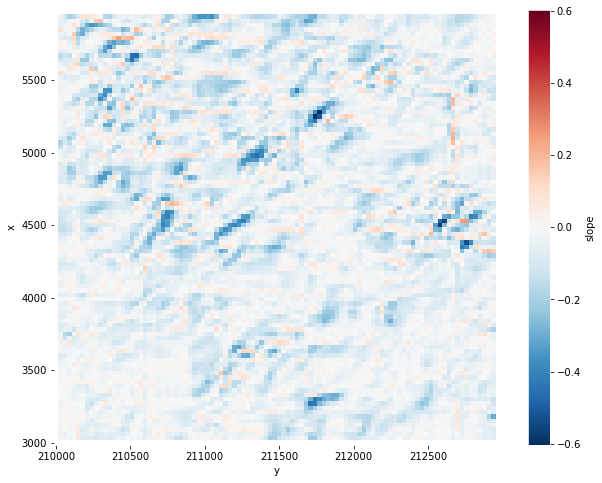

In [179]:
(slope_loop-slope_xrspatial).plot()

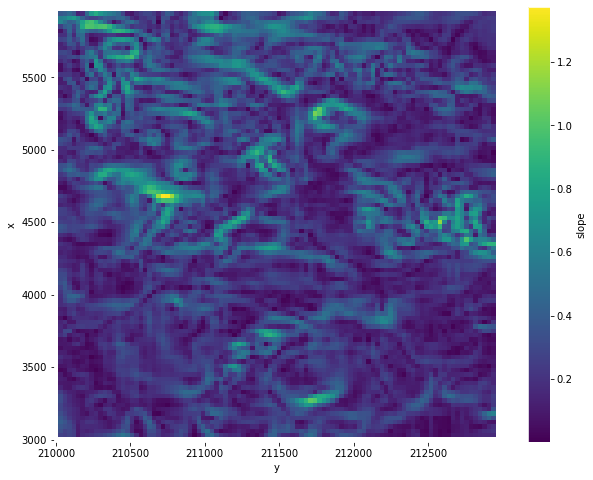

In [180]:
slope_xrspatial.plot(cmap = 'viridis')